# **Import the Dataset**

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/Ratings_Dataset.csv", encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.size, df.shape

(155090, (15509, 10))

# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

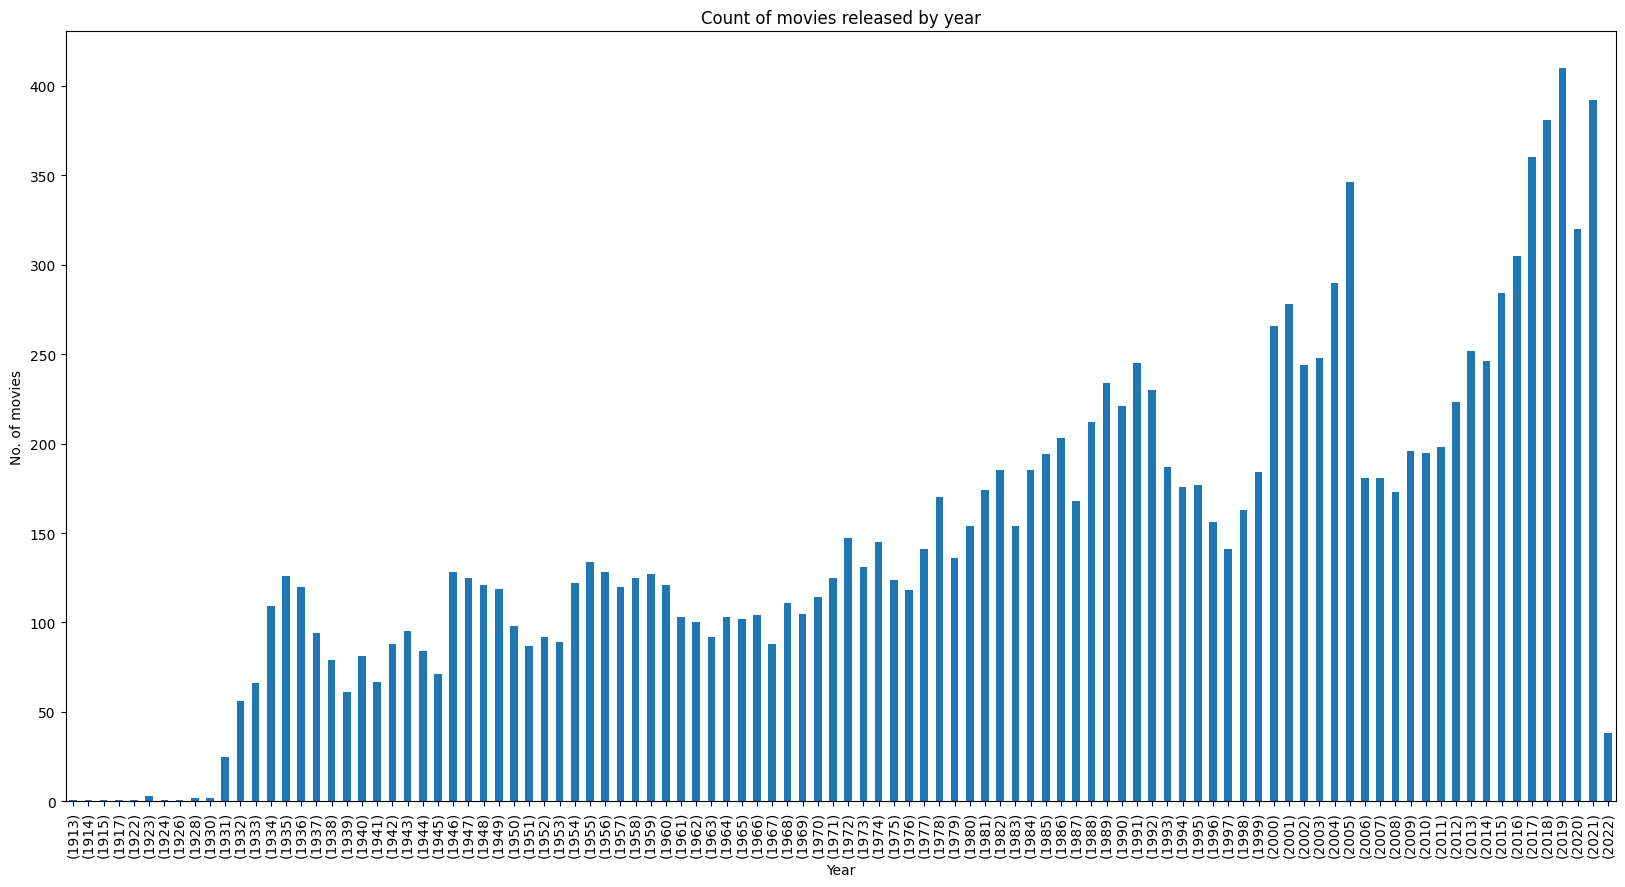

In [ ]:
yearly_count = df['Year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))
yearly_count.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("No. of movies")
plt.title("Count of movies released by year")

plt.show()

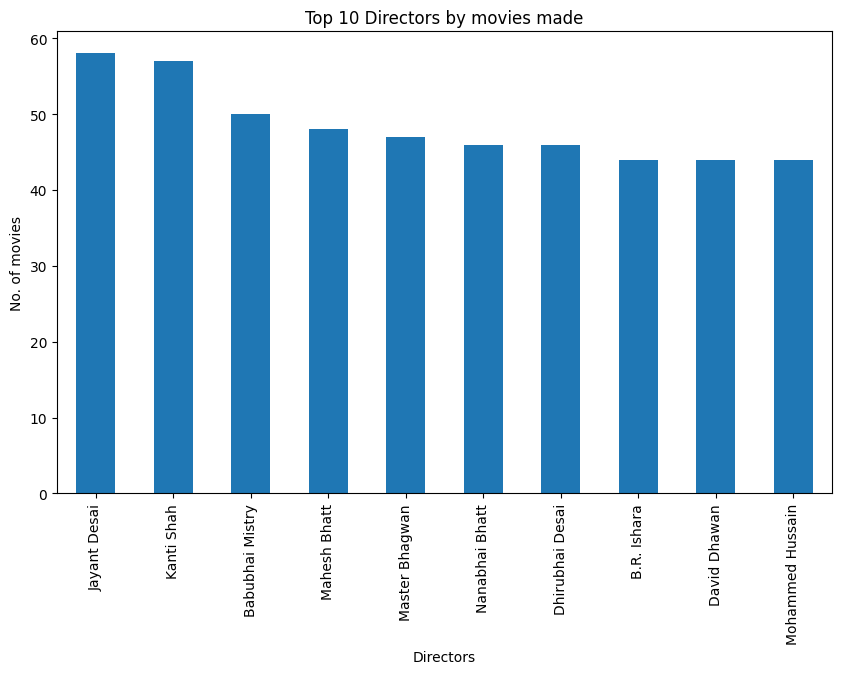

In [ ]:
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar')
plt.xlabel('Directors')
plt.ylabel('No. of movies')
plt.title('Top 10 Directors by movies made')
plt.show()

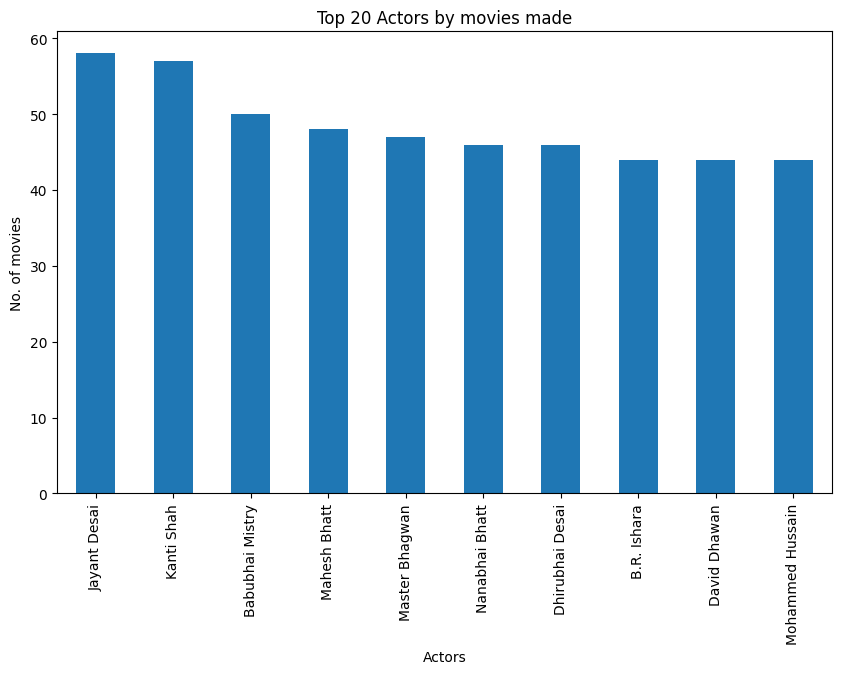

In [ ]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_actors = actors.value_counts().head(20)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar')
plt.xlabel('Actors')
plt.ylabel('No. of movies')
plt.title('Top 20 Actors by movies made')
plt.show()

Text(0.5, 1.0, 'Top 10 Directors vs Average Rating')

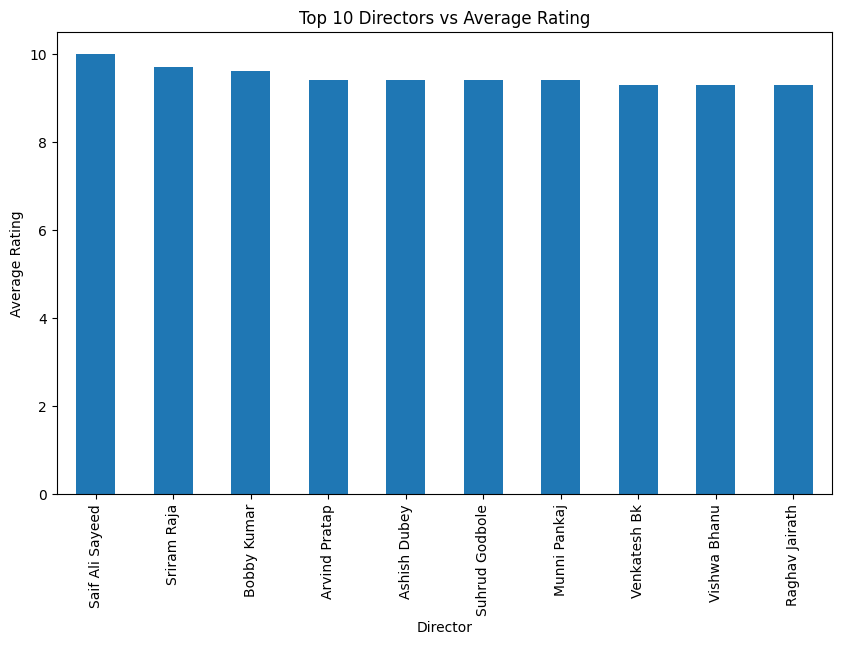

In [ ]:
director_ratings = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
director_ratings.plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors vs Average Rating')

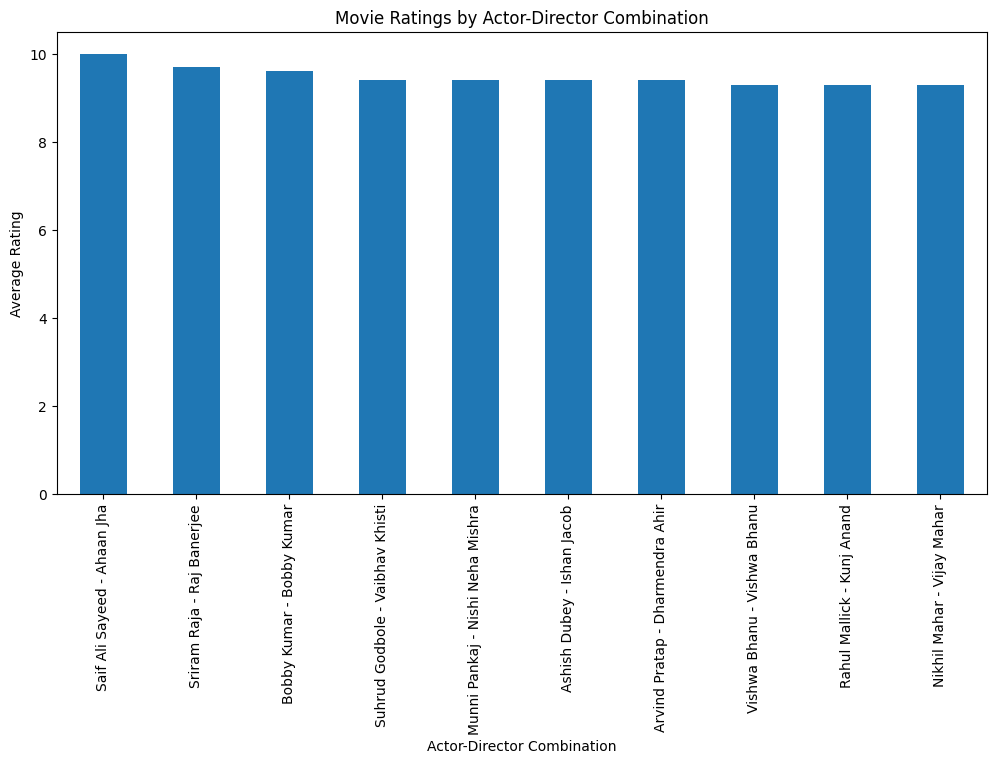

In [ ]:
df['Actor_Director'] = df['Director'] + ' - ' + df['Actor 1']

actor_director_ratings = df.groupby('Actor_Director')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
actor_director_ratings.plot(kind='bar')
plt.xlabel('Actor-Director Combination')
plt.ylabel('Average Rating')
plt.title('Movie Ratings by Actor-Director Combination')
plt.show()

df = df.drop('Actor_Director', axis=1)

# **Data Cleaning**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.drop_duplicates(subset=['Name'],inplace=True)
df.size, df.shape

(138380, (13838, 10))

In [ ]:
df.drop(df.index[0])

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(subset=['Year', 'Genre'], inplace=True)
df.isnull().sum()

Name           0
Year           0
Duration    5455
Genre          0
Rating      4716
Votes       4715
Director     426
Actor 1     1001
Actor 2     1397
Actor 3     1859
dtype: int64

In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df['Votes']= df['Votes'].str.replace(',','').apply(pd.to_numeric)
df['Year']= df['Year'].str.replace('(','').str.replace(')','').apply(pd.to_numeric)
df.head()

<ipython-input-16-46d4fe6d9a25>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year']= df['Year'].str.replace('(','').str.replace(')','').apply(pd.to_numeric)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
numerical_cols = ['Year', 'Duration', 'Rating', 'Votes']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     426
Actor 1     1001
Actor 2     1397
Actor 3     1859
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df['Director'] = label_encoder.fit_transform(df['Director'])

<ipython-input-19-779e752f3447>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

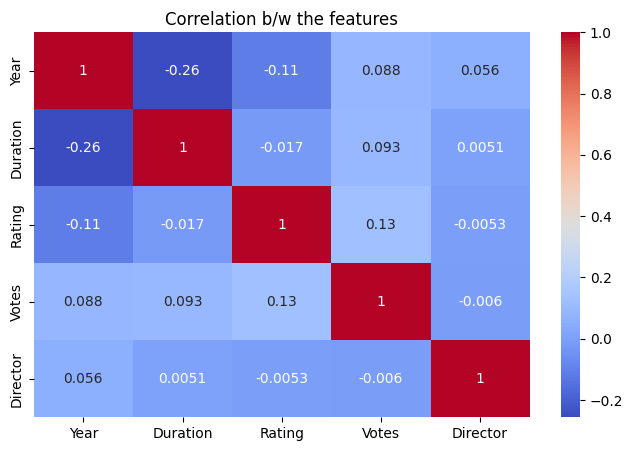

In [ ]:
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation b/w the features")
plt.show

# **Model Implementation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
features = ['Votes', 'Duration', 'Year', 'Director']
X = df[features]
y = df['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9426, 4), (2357, 4), (9426,), (2357,))

**Linear Regression**

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.1033407949880278
R-squared: 0.03589355901837121


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rfr = RandomForestRegressor(n_estimators=100, random_state=123)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [ ]:
y_pred = model_rfr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.863880008932191
R-squared: 0.24513596829723894


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [ ]:
y_pred = model_gb.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8142189877830724
R-squared: 0.28853009509204275
